In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [22]:
clinical_df = pd.read_csv('clinical_annotation.csv', index_col=0)
clinical_df.head()

,ID,LABEL,GENDER,DOB,LYMPH_COUNT
0,P26,1,M,11/3/1933,11.2
1,P183,1,M,5/15/1942,12.8
2,P89,1,M,6/19/1935,9.6
3,P123,1,M,1/27/1931,122.6
4,P61,1,F,3/5/1931,11.6


In [23]:
def birthdate_to_age(birthdate):
    try:
        month, day, year = birthdate.split('/')
    except:
        month, day, year = birthdate.split('-')
    month, day, year = int(month), int(day), int(year)
    return 365*year + 30*month + day

In [24]:
clinical_df['AGE'] = clinical_df['DOB'].apply(birthdate_to_age)
clinical_df['AGE'] = clinical_df['AGE'] - np.mean(clinical_df['AGE'])
del clinical_df['DOB']

In [25]:
clinical_df.head()

,ID,LABEL,GENDER,LYMPH_COUNT,AGE
0,P26,1,M,11.2,-6785.414634
1,P183,1,M,12.8,-3668.414634
2,P89,1,M,9.6,-6189.414634
3,P123,1,M,122.6,-7791.414634
4,P61,1,F,11.6,-7753.414634


In [26]:
clinical_df['GENDER_ID'] = (clinical_df['GENDER'] != 'M')*1
clinical_df.head()

,ID,LABEL,GENDER,LYMPH_COUNT,AGE,GENDER_ID
0,P26,1,M,11.2,-6785.414634,0
1,P183,1,M,12.8,-3668.414634,0
2,P89,1,M,9.6,-6189.414634,0
3,P123,1,M,122.6,-7791.414634,0
4,P61,1,F,11.6,-7753.414634,1


In [27]:
train_data = clinical_df[clinical_df['LABEL']!=-1]

In [296]:
index_to_id, X, y = train_data['ID'].to_numpy(), train_data[['LYMPH_COUNT', 'AGE', 'GENDER_ID']].to_numpy(),train_data['LABEL'].to_numpy() 

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_scaled = scaler.fit_transform(X)

In [359]:
def CV_model(model, n_fold = 20):
    score = []
    for n in range(n_fold):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.fit_transform(X_val)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        score.append(balanced_accuracy_score(y_pred, y_val))
    return np.mean(score), np.std(score)

In [360]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score

m, std = CV_model(GradientBoostingClassifier(learning_rate=.1))
print(m, std)

/home/nathan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/nathan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.7653900528653429 0.09065758213017287


In [361]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score

m, std = CV_model(AdaBoostClassifier(learning_rate=.05))
print(m, std)

0.8213668624171285 0.05950713101978695


In [362]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

m, std = CV_model(RandomForestClassifier())
print(m, std)

/home/nathan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/nathan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.741097972953176 0.05574521163371442


In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

m, std = CV_model(LogisticRegression())
print(m, std)

0.828430232862752 0.06189317333338591


In [364]:
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score

m, std = CV_model(SVC())
print(m, std)

0.7842965449253992 0.09050660813835158


In [365]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score

m, std = CV_model(DecisionTreeClassifier())
print(m, std)

0.7794795785227013 0.06805819401859192


/home/nathan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [176]:
print(clf.coef_)

[[ 2.13682263 -1.35964841 -0.48525626]]


In [330]:
test_data = clinical_df[clinical_df['LABEL']==-1]

In [331]:
index_to_id_test, X_test, y_test = test_data['ID'].to_numpy(), test_data[['LYMPH_COUNT', 'AGE', 'GENDER_ID']].to_numpy(),test_data['LABEL'].to_numpy() 

In [332]:
X_test = scaler.fit_transform(X_test)

In [333]:
y_pred_test = clf.predict(X_test)

In [334]:
np.array([index_to_id_test, y_pred_test]).T

array([['P71', 1],
       ['P16', 1],
       ['P114', 1],
       ['P170', 1],
       ['P98', 1],
       ['P69', 1],
       ['P92', 1],
       ['P132', 1],
       ['P81', 1],
       ['P73', 1],
       ['P143', 1],
       ['P175', 1],
       ['P56', 1],
       ['P139', 1],
       ['P152', 1],
       ['P203', 1],
       ['P75', 1],
       ['P9', 1],
       ['P24', 1],
       ['P4', 0],
       ['P32', 1],
       ['P120', 1],
       ['P138', 1],
       ['P172', 1],
       ['P57', 1],
       ['P195', 1],
       ['P68', 0],
       ['P133', 1],
       ['P14', 1],
       ['P119', 1],
       ['P7', 0],
       ['P49', 1],
       ['P93', 1],
       ['P178', 0],
       ['P58', 1],
       ['P108', 1],
       ['P197', 1],
       ['P196', 1],
       ['P86', 1],
       ['P18', 1],
       ['P188', 1],
       ['P148', 1]], dtype=object)

In [180]:
result_df = pd.DataFrame(data = np.array([index_to_id_test, y_pred_test]).T, columns= ['ID', 'LABEL'])

In [108]:
result_df

,ID,LABEL
0,P71,1
1,P16,1
2,P114,1
3,P170,1
4,P98,0
5,P69,0
6,P92,1
7,P132,1
8,P81,0
9,P73,1


In [62]:
result_df.to_csv('result_logreg.csv', index=False)

In [181]:
import seaborn as sns

# calculate the correlation matrix
corr = train_data.corr('spearman')

# plot the heatmap
print(corr)

                LABEL  LYMPH_COUNT       AGE  GENDER_ID
LABEL        1.000000     0.657374 -0.484758  -0.030689
LYMPH_COUNT  0.657374     1.000000 -0.323321  -0.023861
AGE         -0.484758    -0.323321  1.000000  -0.139122
GENDER_ID   -0.030689    -0.023861 -0.139122   1.000000


In [190]:
y_pred_probas = clf.predict_proba(X)

In [327]:
cols = np.hstack((y_pred_probas[:,0].reshape(-1,1), np.zeros((len(y_pred_probas),1)),np.ones((len(y_pred_probas),1))))

/home/nathan/.local/lib/python3.8/site-packages/matplotlib/collections.py:1039: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


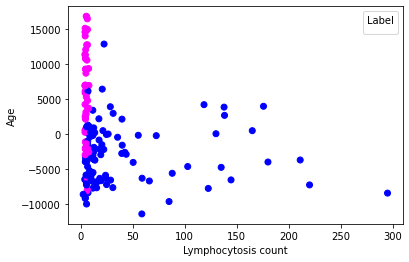

In [328]:
scatter = plt.scatter(train_data['LYMPH_COUNT'], train_data['AGE'], c=cols)
plt.xlabel('Lymphocytosis count')
plt.ylabel('Age')
plt.legend(*scatter.legend_elements(),title="Label")

[Text(495.5921052631579, 770.1, 'X[0] <= -0.401\ngini = 0.422\nsamples = 109\nvalue = [33, 76]'),
 Text(242.28947368421052, 679.5, 'X[1] <= -0.477\ngini = 0.429\nsamples = 45\nvalue = [31, 14]'),
 Text(88.10526315789474, 588.9, 'X[0] <= -0.438\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(44.05263157894737, 498.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(132.1578947368421, 498.3, 'X[2] <= 0.158\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(88.10526315789474, 407.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(176.21052631578948, 407.7, 'X[1] <= -1.275\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(132.1578947368421, 317.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(220.26315789473685, 317.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(396.47368421052636, 588.9, 'X[1] <= 0.524\ngini = 0.284\nsamples = 35\nvalue = [29, 6]'),
 Text(308.36842105263156, 498.3, 'X[1] <= -0.253\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(264.3157894736842, 

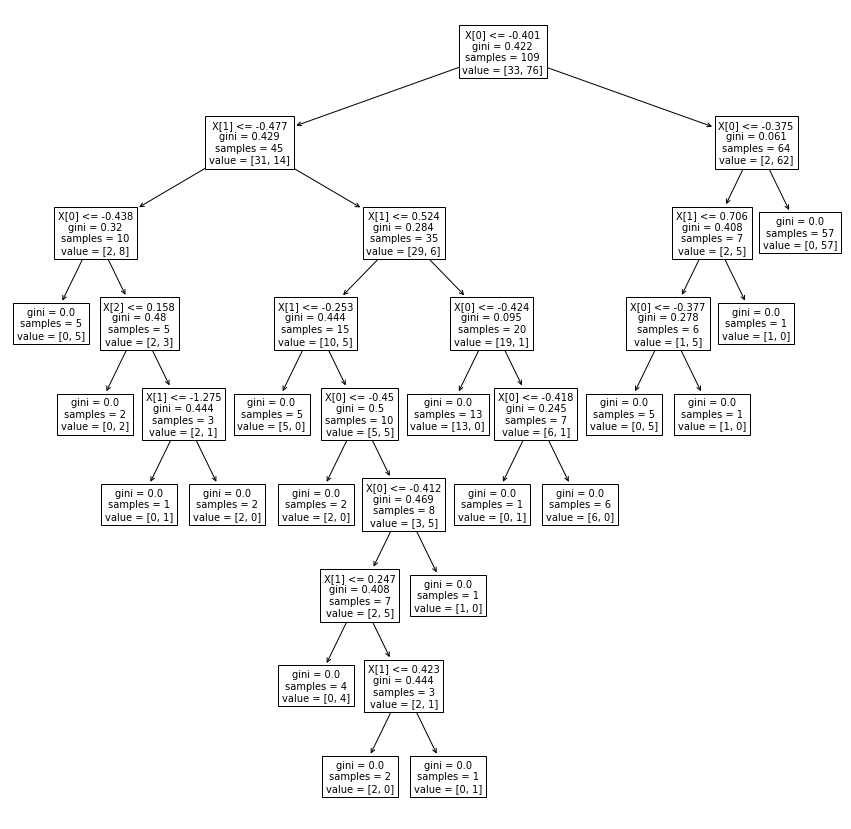

In [198]:
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(clf)

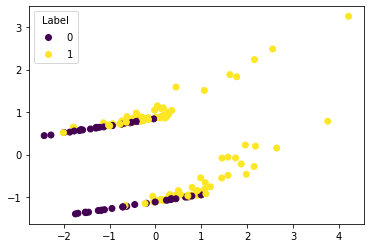

In [203]:
from sklearn.decomposition import TruncatedSVD

X_embedded = TruncatedSVD(n_components=2).fit_transform(X)
scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=train_data['LABEL'])
plt.legend(*scatter.legend_elements(),title="Label")